# What is the future selling price of a home?
We will begin this notebook with the usual import cell and by reading our dataset into pandas dataframes.

In [56]:
import os

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = './challenge_data'

In [3]:
trainDf = pd.read_csv(os.path.join(base_dir, 'train.csv'))
testDf = pd.read_csv(os.path.join(base_dir, 'test.csv'))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-the-future-selling-price-of-a-home?" data-toc-modified-id="What-is-the-future-selling-price-of-a-home?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is the future selling price of a home?</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Cleaning-and-Preparing-the-Data" data-toc-modified-id="Cleaning-and-Preparing-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning and Preparing the Data</a></span></li><li><span><a href="#Modeling-Approaches" data-toc-modified-id="Modeling-Approaches-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling Approaches</a></span></li><li><span><a href="#Model-Tuning-and-Training" data-toc-modified-id="Model-Tuning-and-Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Tuning and Training</a></span></li><li><span><a href="#Model-Validation" data-toc-modified-id="Model-Validation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Validation</a></span></li></ul></div>

# Exploratory Analysis
Before starting to dig into our dataset features, let's start by having a look at what kind of data it contains and at some statistics about them.

In [77]:
trainDf.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [78]:
print('The training dataset contains', len(trainDf), 'rows')

The training dataset contains 1200 rows


In [5]:
trainDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1200.000000,1200.000000,990.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1194.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,57.075000,70.086869,10559.411667,6.105000,5.568333,1971.350833,1984.987500,103.962312,444.886667,...,95.136667,46.016667,22.178333,3.653333,14.980833,1.909167,40.453333,6.311667,2007.810833,181414.628333
std,346.554469,42.682012,23.702029,10619.135549,1.383439,1.120138,30.048408,20.527221,183.534953,439.987844,...,124.034129,65.677629,61.507323,29.991099,54.768057,33.148327,482.323444,2.673104,1.319027,81070.908544
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.750000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.500000,50.000000,70.000000,9434.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163700.000000
75%,900.250000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,166.750000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1200.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


The price range of our houses goes from 34,900 \$ to 755,000 \$.

As we can already see, there are missing values which we will have to deal with. Let's see which features have missing values.

In [76]:
any_mv = trainDf.isna().any()
columns_with_missing_values = [any_mv.index[i] for i in range(len(any_mv)) if any_mv[i]]
missing_values_count = [trainDf[col].isna().sum() for col in columns_with_missing_values]
missing_str = ['{}: {}'.format(x, y) for (x,y) in zip(columns_with_missing_values, missing_values_count)]
print('Amount of missing values per column:\n -', 
      '\n - '.join(missing_str))
print('{} our of {} features have missing values'.format(
    len(columns_with_missing_values), len(trainDf.columns)
))

Amount of missing values per column:
 - LotFrontage: 210
 - Alley: 1125
 - MasVnrType: 6
 - MasVnrArea: 6
 - BsmtQual: 32
 - BsmtCond: 32
 - BsmtExposure: 33
 - BsmtFinType1: 32
 - BsmtFinType2: 33
 - FireplaceQu: 564
 - GarageType: 67
 - GarageYrBlt: 67
 - GarageFinish: 67
 - GarageQual: 67
 - GarageCond: 67
 - PoolQC: 1196
 - Fence: 973
 - MiscFeature: 1153
18 our of 81 features have missing values


There are three features (Alley, PoolQC and MiscFeature) for which most of the values are empty. This has to be taken into account at later stages of our analysis.

Let's now have a look at the correlation between each feature.

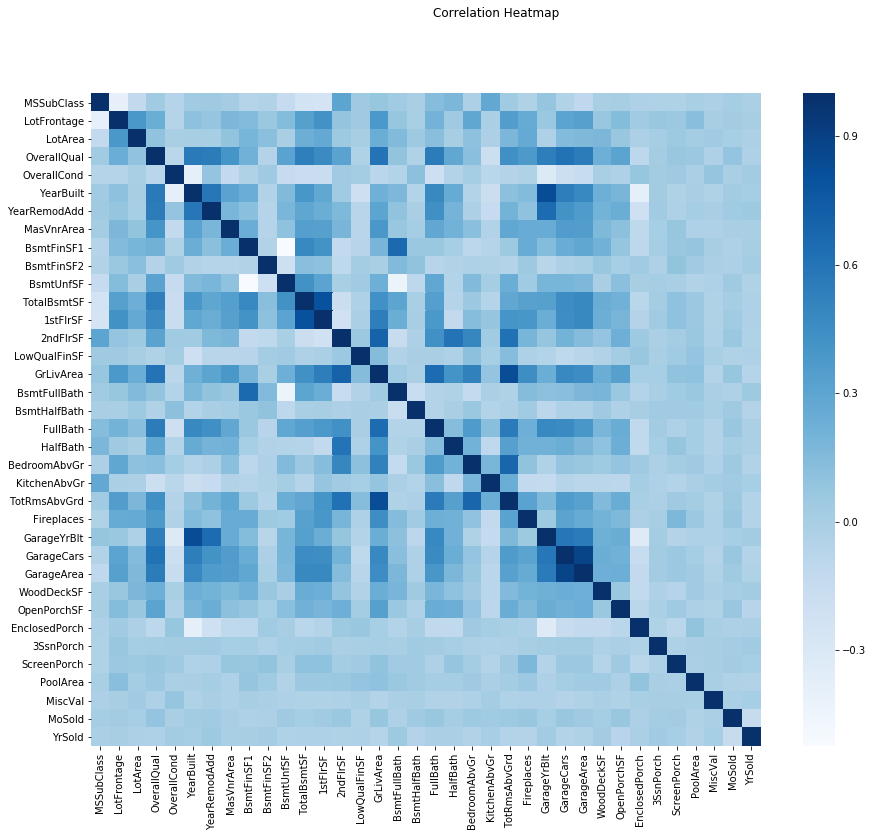

In [59]:
pd.set_option('precision',2)
plt.figure(figsize=(15,12))
# Drop the Id and SalePrice features because it is irrelevant to our purpose
# We will take a look at SalePrice later
sns.heatmap(trainDf.drop(['Id', 'SalePrice'],axis=1).corr(), cmap='Blues')
plt.suptitle('Correlation Heatmap')
plt.show()

From our plot we can see that the following feature pairs are strongly correlated:
 - GarageCars and GarageArea
 - 1stFirSF (First Floor square feet) and TotalBsmtSF (Total square feet of basement area)
 - YearBuilt and GarageYrBlt
 - TotRmsAbvGrd (Total rooms above grade) and GrLivArea (Above grade (ground) living area square feet)

By looking at the description of those features, it seems quite obvious the reason why they are highly correlated. This kind of information will be quite useful in the next steps of our analysis, especially in the case we will decide to perform some dimensionality reduction using e.g. PCA methods.

What could be very interesting to see at this point is the correlation between the `SalePrice` feature and all the others.

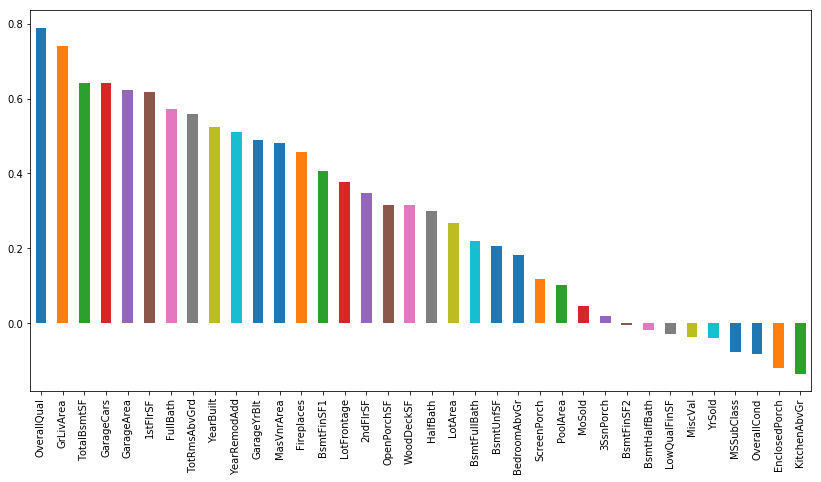

In [40]:
corr_with_SalePrice = trainDf.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.show()

del corr_with_SalePrice

Obviously the OverallQual (rates the overall material and finish of the house) feature is the one which is more positivelly correlated to the SalePrice. On the other hand there some features e.g. KitchenAbvGr which makes SalePrice decrease. Of course we can see that there are also some other attriuted which are completely uncorrelated to the SalePrice.

Let's now have a look at possible outliers present in our features.

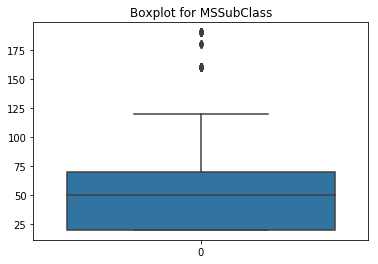

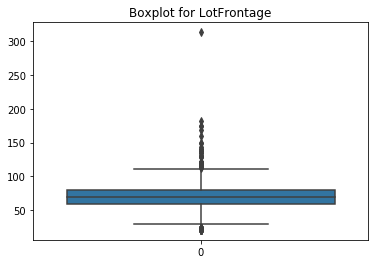

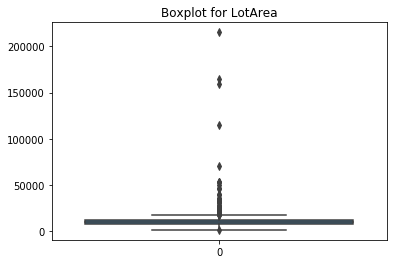

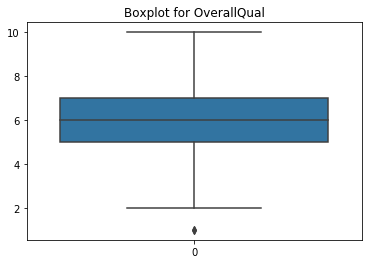

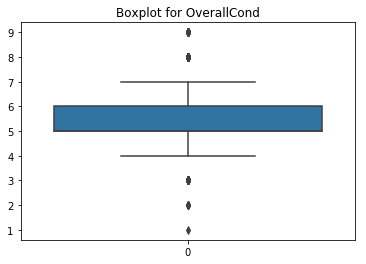

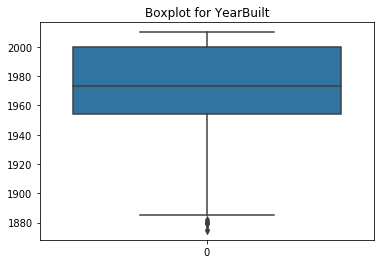

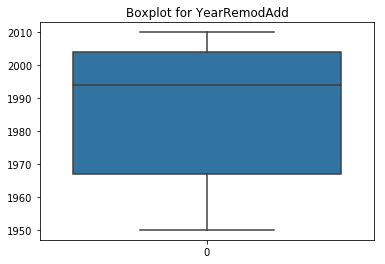

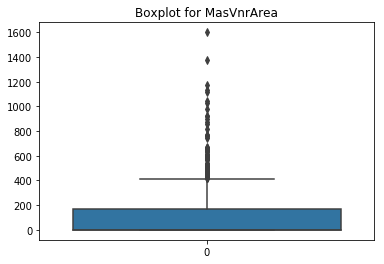

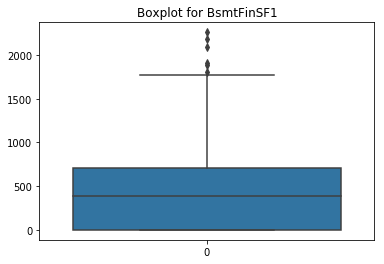

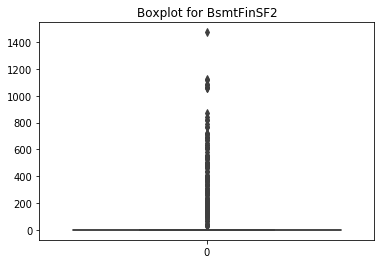

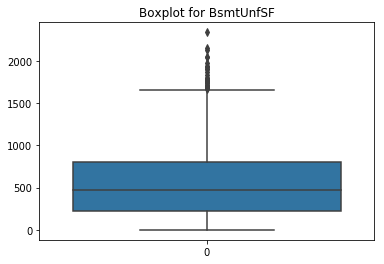

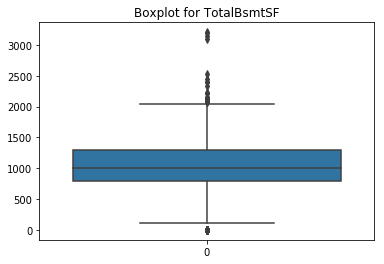

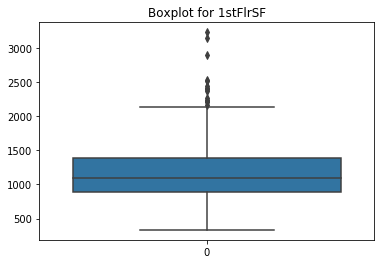

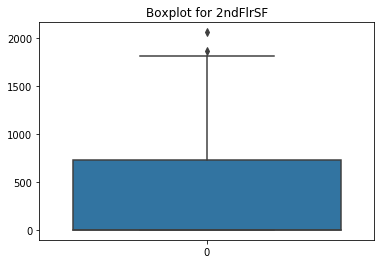

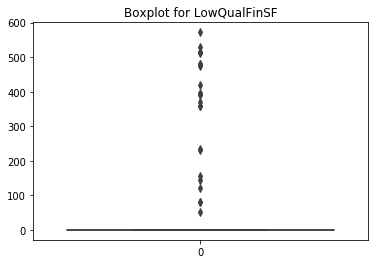

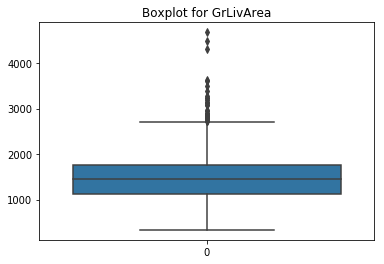

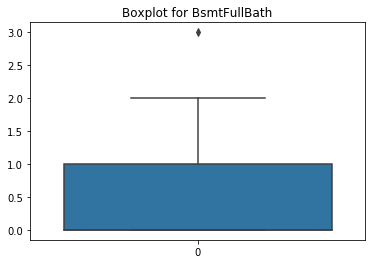

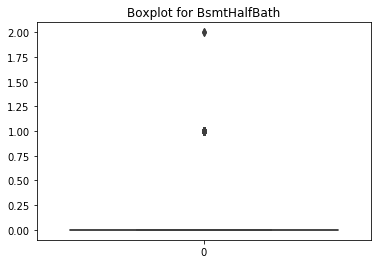

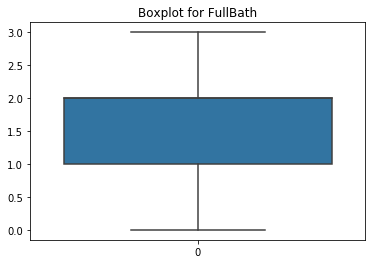

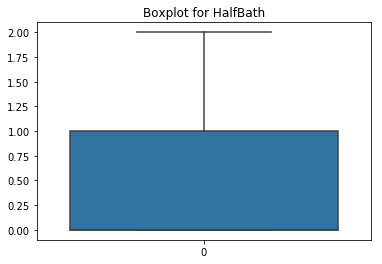

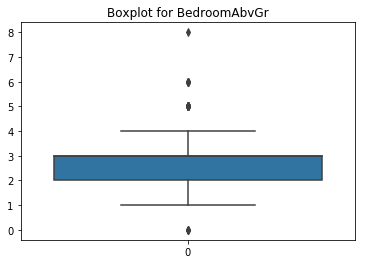

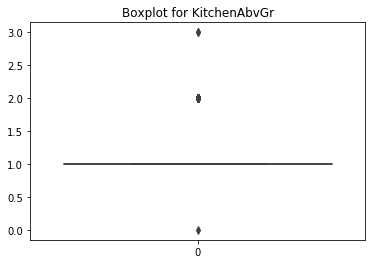

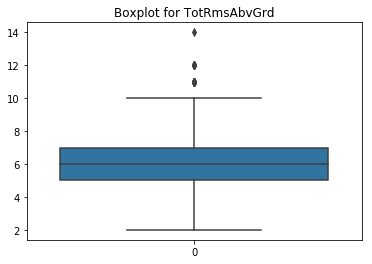

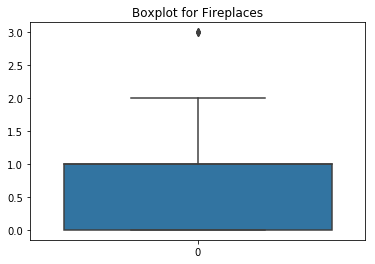

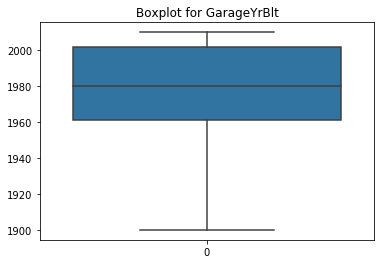

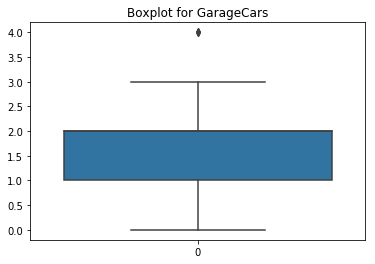

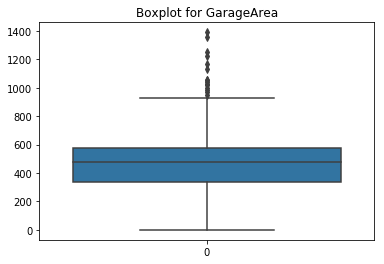

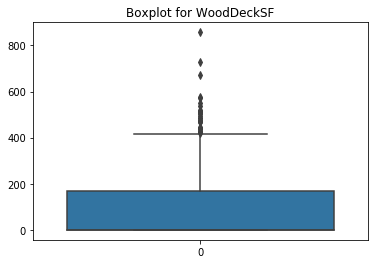

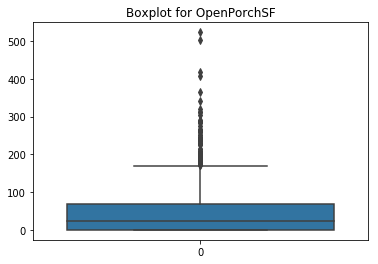

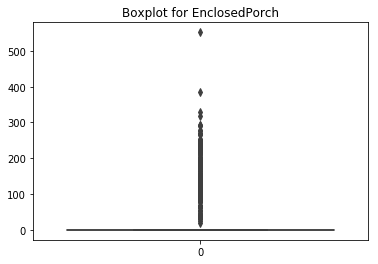

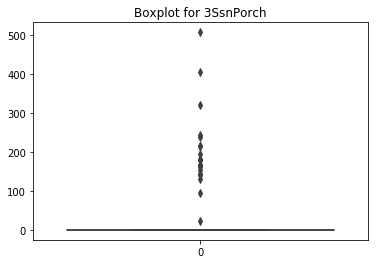

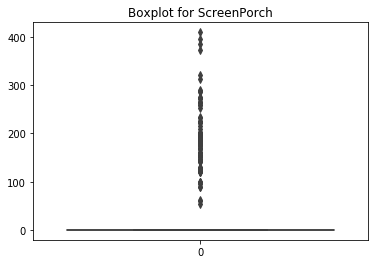

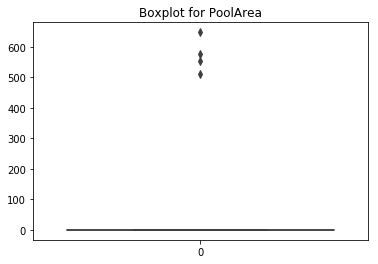

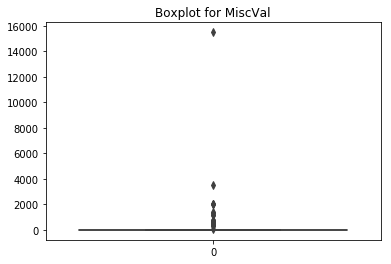

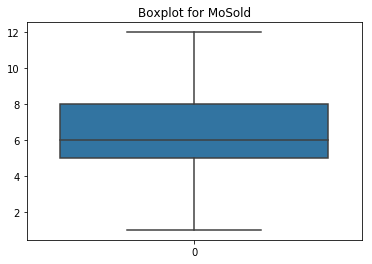

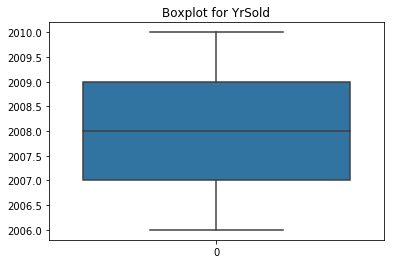

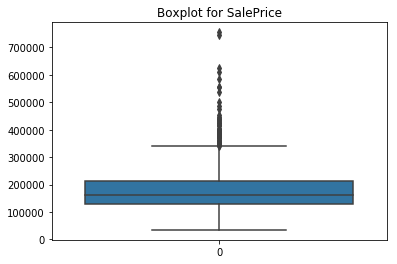

In [58]:
tmp_df = trainDf.drop(['Id'],axis=1)

for feature in tmp_df.columns:
    # I want to consider only non-categorical features
    if is_numeric_dtype(trainDf[feature]):
        sns.boxplot(data=trainDf[str(feature)])
        plt.title('Boxplot for {}'.format(feature))
        plt.show()

It looks like the following features may have outliers:
 - LotFronage
 - LotArea
 - MasVnrArea
 - BsmtFinSF2
 - LowQualFinSF
 - GrLivArea
 - WoodDeckSF
 - OpenPorchSF
 - EnclosedPorch
 - 3SsnPorch
 - ScreenPorch
 - PoolArea
 - MiscVal
 
However the boxplot analysis is not exahustive. In fact, for some features we can not rely too much on the boxplot. As an example, let's consider the PoolArea feature. It is quite normal that most of the values are very close to 0 (the majority of the houses do not have a pool) causing those houses having a pool to be seen as having an outlier value for that feature.

It is very likely that similar reasoning can be applied to most of the features listed above.

# Cleaning and Preparing the Data

# Modeling Approaches

# Model Tuning and Training

# Model Validation